In [1]:
# step 1 : load test step
import pandas as pd
import thecannon as tc
from astropy.io import fits
%pylab inline

model = tc.CannonModel.read('./cannon_models/galah_labels_5para_highSNR.model')
w = fits.open('./data_files/gaia_rvs_wavelength.fits')[0].data[20:-20]
test_set = pd.read_csv('./data_files/cannon_test_set.csv')
test_set
# question : where is the flux saved to?

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,Unnamed: 0.1,Unnamed: 0,galah_sobject_id,gaia_designation,gaia_dr3_source_id,galah_teff,galah_eteff,galah_logg,galah_elogg,galah_feh,...,mh_gspphot,vbroad,vbroad_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,rv_nb_transits,vbroad_nb_transits
0,3,1143,131119001701221,Gaia DR3 2898239468873596800,2898239468873596928,5776.4690,70.544017,4.380110,0.175332,0.040967,...,-0.3057,5.641454,0.807378,-3.845842,0.119350,6.221316,6.531441,5.739753,25.0,24.0
1,7,5432,140114004201396,Gaia DR3 5757081675179809280,5757081675179808768,5729.3710,88.895805,4.093691,0.181760,-0.286234,...,NaN,NaN,NaN,81.562380,0.427746,11.929993,12.249106,11.442196,40.0,NaN
2,10,7128,140118002001323,Gaia DR3 3323272868460093952,3323272868460093952,5985.2573,72.948810,4.384319,0.177890,-0.060314,...,-0.3373,9.096525,4.155895,43.590153,0.450441,11.012880,11.296660,10.564198,14.0,10.0
3,15,8540,140209003202377,Gaia DR3 604918831945837312,604918831945837312,7443.6810,70.039536,4.011475,0.180896,-0.173678,...,0.0336,44.273823,10.200612,27.347050,1.895446,10.533549,10.645807,10.325345,23.0,13.0
4,16,9020,140303001002144,Gaia DR3 3474770688701889920,3474770688701890048,4653.4570,71.119386,4.751197,0.177519,-0.021197,...,0.4771,6.791906,5.515139,37.711304,0.392199,12.041642,12.811839,11.187373,25.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7286,588295,190225005301069,Gaia DR3 6000286264203417600,6000286264203417600,5896.8150,104.187553,4.259187,0.195128,0.497816,...,0.3040,NaN,NaN,-26.495325,0.331065,10.332420,10.644321,9.833400,12.0,NaN
1455,7287,588338,190225005301148,Gaia DR3 5907282149029060608,5907282149029060608,6567.9710,72.304613,4.072681,0.175713,-0.212295,...,-0.4052,49.611046,4.139373,20.557411,0.766518,10.339942,10.570374,9.955944,14.0,8.0
1456,7289,588344,190225005301157,Gaia DR3 5907274005770582912,5907274005770583040,6214.9146,69.974425,4.296502,0.175031,-0.097979,...,-0.3902,7.030707,3.403972,-17.218925,0.234826,8.829233,9.081428,8.413541,10.0,6.0
1457,7290,588347,190225005301160,Gaia DR3 5907297748350311680,5907297748350311424,6063.3910,78.432870,4.241026,0.177816,0.222091,...,-0.1004,NaN,NaN,14.916134,0.630526,11.095340,11.401357,10.625781,12.0,NaN


In [2]:
# okay now maybe I'll show fits of the 3 in there?
def r(n):
    return(np.round(n, decimals=2))

In [3]:
flux_data = pd.read_csv('./data_files/flux_data.csv')
flux_err_data = pd.read_csv('./data_files/flux_err_data.csv')

In [4]:
test_set[['gaia_designation', 'source_id', 'gaia_dr3_source_id']]

,gaia_designation,source_id,gaia_dr3_source_id
0,Gaia DR3 2898239468873596800,2898239468873596800,2898239468873596928
1,Gaia DR3 5757081675179809280,5757081675179809280,5757081675179808768
2,Gaia DR3 3323272868460093952,3323272868460093952,3323272868460093952
3,Gaia DR3 604918831945837312,604918831945837312,604918831945837312
4,Gaia DR3 3474770688701889920,3474770688701889920,3474770688701890048
...,...,...,...
1454,Gaia DR3 6000286264203417600,6000286264203417600,6000286264203417600
1455,Gaia DR3 5907282149029060608,5907282149029060608,5907282149029060608
1456,Gaia DR3 5907274005770582912,5907274005770582912,5907274005770583040
1457,Gaia DR3 5907297748350311680,5907297748350311680,5907297748350311424


In [6]:
# next: I need to plot one of the test spectra based on the saved dataframe
# and then I need to run it for all of them, which may take a while
# maybe I can save the test set fluxes to an array?
teff_galah, teff_cannon = [], []
logg_galah, logg_cannon = [], []
feh_galah, feh_cannon = [], []
alpha_galah, alpha_cannon = [], []
vbroad_galah, vbroad_cannon = [], []
chi_sq, snr = [], []

for source_id in test_set.source_id.to_numpy()[:2000]:
    row = test_set.loc[test_set.source_id==source_id]
    teff_galah.append(row['galah_teff'].to_numpy()[0])
    logg_galah.append(row['galah_logg'].to_numpy()[0])
    feh_galah.append(row['galah_feh'].to_numpy()[0])
    alpha_galah.append(row['galah_alpha_fe'].to_numpy()[0])
    vbroad_galah.append(row['galah_vbroad'].to_numpy()[0])
    
    flux = flux_data[str(source_id)].to_numpy()[20:-20]
    ivar = 1/flux_err_data[str(source_id)].to_numpy()[20:-20]**2
    result = model.test(flux, ivar)
    teff_fit, logg_fit, feh_fit, alpha_fit, vbroad_fit = result[0][0]
#     teff_fit, logg_fit, feh_fit, vbroad_fit = result[0][0]
    chi_sq.append((result[2][0]['chi_sq']))
    snr.append((result[2][0]['snr']))
    
    teff_cannon.append(teff_fit)
    logg_cannon.append(logg_fit)
    feh_cannon.append(feh_fit)
    alpha_cannon.append(alpha_fit)
    vbroad_cannon.append(vbroad_fit)

stty: 2023-04-13 13:46:59,734 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:46:59,736 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stdin isn't a terminal
stty: stdin isn't a terminal
2023-04-13 13:46:59,788 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:46:59,790 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:46:59,860 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:46:59,861 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:46:59,897 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:46:59,899 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:46:59,945 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:46:59,946 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:46:59,998 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,001 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:00,058 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,060 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:00,140 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,142 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:00,187 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,189 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:00,238 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,240 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:00,291 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,294 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:00,386 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,388 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:00,442 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,445 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:00,500 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:00,502 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:00,555 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:00,559 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:00,634 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,635 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:00,763 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,764 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:00,815 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,817 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:00,902 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:00,904 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:00,940 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,942 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:00,986 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:00,988 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,025 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,028 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,080 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,082 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,136 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,138 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,179 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,180 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,227 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,229 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,276 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,278 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,322 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,324 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,376 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,379 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:01,422 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:01,424 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:01,483 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,484 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stdin isn't a terminal
stty: stdin isn't a terminal
2023-04-13 13:47:01,513 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,514 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,559 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,561 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:01,600 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:01,602 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,652 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,654 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,695 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,697 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,746 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,748 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,795 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,797 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,837 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,839 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,888 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,890 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:01,962 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:01,964 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,015 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,018 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,066 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,068 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,117 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,118 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:02,155 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:02,157 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,198 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,200 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,250 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,252 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,309 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,311 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,352 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,354 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,384 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,385 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,430 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,432 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,476 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,478 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,514 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,516 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,558 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,560 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,614 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,615 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,662 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,664 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,711 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,713 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,789 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,792 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,838 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,840 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,874 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,875 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,913 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,915 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:02,959 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:02,962 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,007 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,008 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,072 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,075 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,127 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,129 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,164 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,166 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,197 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,200 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,264 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,266 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,301 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,303 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,341 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,343 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,388 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,389 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,439 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,441 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,499 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,501 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,551 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,553 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:03,592 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:03,594 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,632 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,634 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,670 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,671 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,713 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,715 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,755 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,756 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,792 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,794 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,835 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,837 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,884 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,886 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,926 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,928 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:03,963 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:03,964 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,001 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,003 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,055 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,057 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,100 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,102 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,146 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,147 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,196 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,198 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,230 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,232 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,291 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,293 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,336 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,337 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,371 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,373 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,414 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,416 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,476 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,477 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,521 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,522 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,561 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,563 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,606 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,608 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,656 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,658 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:04,692 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:04,694 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,726 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,728 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,762 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,763 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,805 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,807 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:04,837 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:04,839 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,874 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,876 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,914 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:04,916 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:04,999 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,001 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,038 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,040 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,079 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,080 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,124 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,125 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,174 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,175 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,211 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,213 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,246 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,247 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,293 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,295 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,340 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,342 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,393 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,395 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,454 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,456 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:05,507 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:05,509 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,611 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,613 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,668 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,670 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,704 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,706 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,795 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,798 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,834 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,836 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,878 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,880 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,912 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,913 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,961 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:05,963 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:05,997 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,000 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,055 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,057 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:06,105 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:06,107 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:06,152 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:06,154 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:06,204 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:06,205 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,255 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,257 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,303 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,305 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,354 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,356 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:06,405 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:06,407 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,461 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,463 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,510 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,511 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,547 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,549 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,602 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,603 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,651 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,653 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,692 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,694 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:06,737 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:06,738 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,787 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,789 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,840 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,842 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,884 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,886 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,916 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,918 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:06,957 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:06,959 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,011 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,013 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,047 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,050 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,095 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,097 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,126 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,127 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,174 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,176 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,226 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,228 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,272 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,274 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,312 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,314 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,358 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,360 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,398 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,400 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,445 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,447 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,524 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,526 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,565 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,567 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,613 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,615 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,682 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,684 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,720 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,722 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,771 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,773 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,805 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,806 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,849 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,851 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,888 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,890 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:07,955 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:07,956 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,001 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,003 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,057 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,059 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,098 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,099 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,143 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,145 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,189 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,191 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,232 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,233 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,274 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,276 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,329 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,331 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,380 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,382 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,442 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,444 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:08,485 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:08,487 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,555 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,557 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,593 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,595 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,738 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,740 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,784 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,786 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,839 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,841 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,883 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,885 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:08,930 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:08,932 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:08,973 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:08,975 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,022 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,024 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,064 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,065 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,110 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,112 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,148 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,150 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,190 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,191 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,246 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,248 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,292 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,294 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,337 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,339 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,377 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,378 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,420 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,422 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:09,475 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:09,476 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,513 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,515 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,553 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,555 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,609 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,611 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,645 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,647 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,694 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,696 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,738 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,740 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,806 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,808 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,849 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,850 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,891 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,893 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,925 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,927 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:09,971 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:09,973 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,022 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,024 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,065 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,066 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:10,107 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:10,109 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,152 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,154 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:10,193 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:10,194 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,245 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,247 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,307 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,309 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,355 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,357 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,393 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,396 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:10,452 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:10,454 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,496 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,498 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,547 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,548 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,579 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,580 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,628 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,629 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,681 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,682 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,738 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,739 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:10,774 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:10,776 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,826 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,828 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,871 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,872 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,922 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,924 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:10,982 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:10,985 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:11,022 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:11,024 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,061 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,063 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,109 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,111 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,147 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,149 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,198 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,200 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,249 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,252 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,293 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,295 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,346 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,348 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,399 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,401 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,456 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,457 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,496 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,498 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,552 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,554 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:11,590 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:11,592 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,641 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,642 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,683 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,685 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,745 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,747 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,789 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,791 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,828 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,830 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:11,870 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,872 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,908 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,909 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:11,939 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:11,940 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:11,990 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:11,992 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,037 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,039 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,082 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,084 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,123 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,126 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:12,175 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:12,177 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,235 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,237 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,280 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,281 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,332 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,334 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,391 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,393 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,427 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,428 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,457 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,459 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,507 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,509 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,559 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,560 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,611 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,613 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,659 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,660 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,709 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,711 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,744 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,745 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:12,795 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:12,796 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,845 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,847 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,896 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,898 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:12,958 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:12,960 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:13,008 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:13,010 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:13,058 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:13,061 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:13,109 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:13,111 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,147 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,149 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,238 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,240 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,287 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,289 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,332 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,333 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,372 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,373 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,423 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,425 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,494 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,496 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,571 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,573 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,614 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,615 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:13,649 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,651 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,724 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,727 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,768 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,770 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,803 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,805 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,849 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,851 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:13,886 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:13,888 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,935 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,937 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:13,972 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:13,974 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,023 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,025 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:14,062 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:14,064 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,107 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,109 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,146 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,147 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,186 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,188 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,230 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,231 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,272 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,273 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,323 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,325 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,363 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,364 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,417 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,419 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,466 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,468 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,508 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,510 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,557 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,559 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,599 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,601 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,662 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,663 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,703 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,705 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,758 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,761 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,800 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,803 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:14,853 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:14,855 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:14,892 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:14,894 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:14,951 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:14,953 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,006 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,008 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,053 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,056 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,116 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,118 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,159 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,161 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,216 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,218 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,274 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,276 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,356 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,358 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,403 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,405 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,441 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,443 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,491 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,493 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,541 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,542 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,591 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,593 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,640 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,642 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,677 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,678 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,711 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,713 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,759 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,761 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,822 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,823 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,877 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,879 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,912 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,914 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:15,981 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:15,983 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,027 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,029 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,064 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,065 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,121 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,123 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,171 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,173 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,247 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,249 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,287 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,289 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:16,376 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:16,379 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,433 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,435 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,490 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,492 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,535 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,536 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,579 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,581 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:16,626 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,628 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,680 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,681 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,717 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,719 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:16,768 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:16,770 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,812 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,815 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,862 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,863 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:16,904 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,906 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:16,973 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:16,975 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:17,022 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:17,023 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:17,091 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:17,093 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,141 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,142 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,199 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,201 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,244 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,247 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,305 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,307 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:17,354 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:17,357 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:17,395 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:17,397 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,442 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,444 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,493 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,494 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,548 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,550 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,597 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,599 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:17,655 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:17,657 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,698 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,700 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,741 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,742 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,786 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,788 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,830 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,832 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,926 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,928 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:17,991 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:17,993 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,038 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,040 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,085 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,087 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,126 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,127 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,177 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,179 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:18,217 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,219 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,271 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,273 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,345 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,347 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,390 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,392 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:18,446 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:18,448 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:18,502 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:18,504 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:18,538 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:18,540 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,587 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,589 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,634 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,636 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:18,672 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:18,674 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,714 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,716 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,752 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,754 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,815 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,817 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,864 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,866 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,908 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,910 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:18,961 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:18,963 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,010 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,011 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,052 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,054 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,106 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,108 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,149 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,151 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,187 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,190 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,236 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,238 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,280 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,281 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,333 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,334 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,373 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,376 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,436 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,438 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,479 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,481 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,528 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,530 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,569 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,571 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:19,608 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:19,610 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,673 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,675 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,731 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,732 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,778 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,779 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,811 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,813 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,853 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,855 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,898 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,900 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:19,944 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:19,946 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,025 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,027 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,075 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,077 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,127 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,129 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,168 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,170 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,218 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,219 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,262 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,264 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,299 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,301 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,335 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,337 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:20,375 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,377 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stdin isn't a terminal
stty: stdin isn't a terminal
2023-04-13 13:47:20,414 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,416 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:20,456 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:20,457 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,498 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,500 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:20,557 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:20,559 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,595 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,597 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,637 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,639 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,691 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,693 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,731 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,733 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:20,772 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,774 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         

stdin isn't a terminal


stty: stdin isn't a terminal
2023-04-13 13:47:20,809 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,810 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,852 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,855 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,890 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,892 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,951 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,953 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:20,995 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:20,997 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,042 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,044 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,081 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,083 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,131 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,133 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:21,182 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:21,184 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,226 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,228 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,278 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,279 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:21,342 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:21,344 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,395 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,397 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,451 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,453 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,489 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,491 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,568 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,570 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:21,624 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:21,626 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:21,665 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:21,667 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,705 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,708 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:21,747 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:21,749 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,797 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,799 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,850 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,852 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,886 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,887 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,926 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,928 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:21,977 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:21,979 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:22,030 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:22,031 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:22,075 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:22,076 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:22,126 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:22,128 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:22,171 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,174 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:22,229 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,231 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:22,274 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:22,276 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:22,321 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,322 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:22,376 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,378 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:22,416 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,419 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:22,479 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,481 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:22,518 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,520 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:22,567 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,570 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:22,634 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,635 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:22,689 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,691 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:22,744 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,746 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:22,800 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:22,802 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:22,854 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:22,857 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:22,912 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,914 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:22,972 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:22,974 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,020 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,023 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:23,067 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,068 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stdin isn't a terminal
stty: 2023-04-13 13:47:23,108 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:23,109 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,164 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,166 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,214 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,215 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:23,249 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:23,251 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,303 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,304 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,361 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,362 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,399 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,402 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,462 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,464 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,513 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,515 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,563 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,565 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,617 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,619 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,664 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,666 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,716 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,718 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,760 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,761 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,824 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,825 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:23,867 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:23,870 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:23,919 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:23,921 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:23,969 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:23,971 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,027 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,029 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,082 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,084 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,141 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,143 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,199 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,202 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,258 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,261 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,301 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,303 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:24,344 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:24,346 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,403 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,405 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,463 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,465 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:24,542 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:24,544 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,587 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,589 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,651 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,653 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:24,712 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:24,714 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,777 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,779 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,829 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,831 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,880 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,882 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,941 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,942 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:24,990 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:24,992 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,042 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,044 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,088 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,090 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,145 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,146 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,197 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,199 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,256 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,258 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,308 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,310 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,356 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,358 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,400 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,402 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,448 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,450 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,501 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,503 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,550 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,552 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,597 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,599 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,652 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,653 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,709 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,711 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,763 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,765 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,807 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,809 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,860 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,862 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,923 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,925 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:25,972 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:25,973 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,040 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,042 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,100 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,102 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:26,157 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:26,159 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,202 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,204 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,260 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,262 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:26,295 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:26,298 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,351 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,353 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,410 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,411 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,446 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,448 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:26,485 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,486 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:26,533 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:26,535 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,601 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,603 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,702 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,704 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,769 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,772 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,829 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,831 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,881 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,882 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,927 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,929 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:26,984 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:26,986 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,054 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,057 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,102 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,104 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,135 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,137 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,181 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,183 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:27,227 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:27,229 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,285 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,286 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,340 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,342 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,387 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,388 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,446 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,448 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,500 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,502 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:27,559 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:27,560 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,618 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,619 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,661 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,664 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,722 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,725 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,792 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,794 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,840 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,842 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,883 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,885 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:27,930 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:27,932 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:27,964 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:27,966 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,014 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,016 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,049 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,051 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,093 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,095 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,152 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,154 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,200 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,202 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,244 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,247 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,284 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,285 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,329 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,330 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,394 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,396 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,442 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,443 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:28,491 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:28,493 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,556 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,559 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:28,595 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:28,598 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:28,646 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,648 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stdin isn't a terminal
stty: stdin isn't a terminal
2023-04-13 13:47:28,681 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,682 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,726 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,728 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:28,774 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:28,775 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,821 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,823 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,869 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,870 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:28,965 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:28,967 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,031 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,033 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,087 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,089 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,143 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,144 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,186 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,187 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,224 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,225 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,279 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,281 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,317 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,318 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,374 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,376 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,424 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,426 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:29,461 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:29,462 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,519 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,521 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,586 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,588 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,650 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,652 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,707 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,709 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,751 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,753 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:29,803 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:29,805 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,838 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,839 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,882 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,884 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,917 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,919 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:29,965 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:29,967 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,029 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,031 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,076 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,078 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,120 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,122 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,175 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,177 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,220 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,222 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,281 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,282 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,364 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,366 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,396 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,398 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,439 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,441 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,495 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,497 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,539 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,542 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:30,579 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:30,581 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,642 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,644 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,698 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,699 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,737 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,739 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,789 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,790 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,838 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,840 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,893 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,895 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,933 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,935 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:30,984 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:30,986 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,031 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,033 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,066 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,068 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,103 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,105 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,149 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,151 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,235 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,237 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,279 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,281 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,332 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,334 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:31,382 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:31,384 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,426 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,430 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,477 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,480 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,512 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,514 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,555 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,557 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,611 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,612 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,653 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,654 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,698 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,700 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,734 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,735 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,771 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,772 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,813 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,815 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:31,858 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:31,860 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:31,924 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:31,927 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:31,967 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:31,969 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,024 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,027 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,089 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,092 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,154 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,156 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,200 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,202 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,250 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,252 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,298 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,300 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:32,342 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,344 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,388 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,390 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,443 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,445 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,503 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,505 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,545 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,547 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,582 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,583 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,623 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,625 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,661 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,663 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,714 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,716 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,755 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,757 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,801 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,802 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:32,840 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,842 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,886 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,889 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,922 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,924 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:32,975 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:32,977 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:33,015 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:33,016 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,106 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,109 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,166 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,168 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:33,225 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:33,227 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,294 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,296 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,346 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,347 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,391 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,393 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,434 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,436 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:33,480 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,482 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,537 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,539 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,589 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,591 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,635 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,637 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,669 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,670 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,722 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,723 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,784 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,786 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,834 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,836 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,896 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,898 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,947 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,949 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:33,981 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:33,983 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,048 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,050 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,104 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,106 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,141 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,143 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,196 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,198 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,252 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,254 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,291 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,292 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,340 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,341 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,390 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,392 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,434 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,436 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,476 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,478 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,530 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,532 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,583 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,585 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,623 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,625 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,677 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,679 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,734 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,735 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,783 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,785 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,829 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,831 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,875 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,877 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,925 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,927 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:34,971 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:34,973 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,045 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,047 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:35,089 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:35,091 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,146 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,148 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,179 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,180 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,226 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,228 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,274 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,276 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,325 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,327 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,386 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,388 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,430 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,431 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:35,485 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:35,487 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,533 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,535 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,579 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,581 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,637 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,639 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,706 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,708 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,765 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,767 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,818 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,820 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,866 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,868 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,907 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,909 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,942 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,943 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:35,984 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:35,985 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,028 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,029 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,067 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,070 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,125 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,126 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,169 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,172 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,219 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,221 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,268 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,270 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,311 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,312 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,348 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,350 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:36,405 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:36,406 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,449 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,451 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,509 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,511 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,555 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,557 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,630 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,631 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,690 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,692 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,729 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,731 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,796 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,798 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,852 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,854 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:36,910 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:36,912 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:36,969 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:36,971 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,032 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,034 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,081 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,083 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,129 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,131 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,164 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,165 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,263 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,265 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,317 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,318 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,359 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,361 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,405 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,407 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,438 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,440 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,481 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,482 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:37,527 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:37,529 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,624 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,626 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:37,674 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:37,676 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,737 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,739 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:37,774 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:37,776 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,820 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,822 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,870 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,871 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:37,903 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:37,905 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:37,953 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:37,955 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,003 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,004 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,039 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,040 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:38,089 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:38,091 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:38,189 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:38,191 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,224 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,225 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,273 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,274 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,315 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,316 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:38,358 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:38,360 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:38,409 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:38,411 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,458 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,459 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,491 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,493 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,531 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,533 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,570 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,572 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,605 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,607 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,667 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,668 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,713 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,715 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:38,769 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:38,770 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,835 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,836 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,875 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,877 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:38,920 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:38,922 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:38,983 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:38,985 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,067 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,068 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,123 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,125 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,171 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,172 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,226 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,228 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,268 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,270 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:39,322 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:39,323 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,362 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,364 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,406 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,408 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,468 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,469 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,531 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,533 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,590 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,591 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,641 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,643 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,692 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,693 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,733 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,735 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,779 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,781 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


2023-04-13 13:47:39,843 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stty: stdin isn't a terminal
2023-04-13 13:47:39,844 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:39,944 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:39,946 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,006 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,008 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,054 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,056 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,091 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,093 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,151 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,153 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,198 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,200 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,256 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,257 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:40,302 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:40,304 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,345 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,346 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,417 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,418 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,460 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,462 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,514 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,516 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,567 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,569 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:40,614 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:40,615 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,664 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,665 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,730 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,731 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,782 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,783 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,842 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,843 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:40,891 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:40,893 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:40,950 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:40,953 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:41,011 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:41,013 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,080 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,082 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,120 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,121 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,159 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,160 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,204 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,206 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,263 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,265 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:41,328 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:41,330 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,393 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,395 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,435 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,437 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,521 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,522 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,586 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,588 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,649 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,651 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,704 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,706 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,754 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,756 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,809 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,811 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,864 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,865 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,901 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,903 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:41,947 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:41,948 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:41,984 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:41,986 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:42,039 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:42,041 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:42,199 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:42,201 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:42,270 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:42,271 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:42,333 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:42,334 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:42,381 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:42,383 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:42,435 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:42,437 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:42,497 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:42,499 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:42,541 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:42,543 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:42,595 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:42,597 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:42,689 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:42,691 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:42,733 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:42,735 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:42,780 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:42,781 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:42,840 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:42,842 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:42,898 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:42,899 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:42,951 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:42,953 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,000 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,002 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,074 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,075 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,115 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,116 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,171 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,172 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,224 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,226 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,267 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,268 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,323 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,324 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,360 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,362 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,413 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,415 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,468 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,471 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:43,513 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:43,515 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,569 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,571 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,611 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,613 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,659 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,660 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,711 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,713 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,759 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,761 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,822 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,823 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,872 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,874 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,905 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,907 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:43,958 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:43,959 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,013 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,014 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,062 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,064 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,109 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,110 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,158 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,160 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,225 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,226 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:44,291 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:44,292 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,363 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,365 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:44,395 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:44,397 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,444 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,446 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,501 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,502 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,551 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,552 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,616 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,618 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,676 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,678 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,724 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,726 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,777 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,778 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:44,831 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:44,833 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,882 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,884 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,945 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,947 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:44,994 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:44,996 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,039 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,041 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,084 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,086 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,134 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,135 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,182 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,183 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,234 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,235 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,290 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,291 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,332 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,335 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,380 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,382 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,417 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,420 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,471 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,472 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:45,528 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,530 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:45,576 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:45,578 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,623 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,625 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,658 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,659 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,711 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,714 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,753 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,754 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,806 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,808 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,857 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,858 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,895 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,897 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:45,949 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:45,951 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:46,000 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,001 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:46,082 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,084 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:46,151 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:46,153 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:46,219 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,221 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:46,286 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:46,288 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:46,344 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,346 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:46,401 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,402 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:46,437 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,439 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:46,479 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,481 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:46,534 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,536 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:46,582 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,583 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:46,623 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,625 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:46,671 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:46,672 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:46,741 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,743 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:46,852 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,854 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:46,901 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:46,903 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,007 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,009 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,061 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,063 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,111 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,113 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,163 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,166 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,222 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,224 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,284 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,286 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,335 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,336 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,393 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,394 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,442 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,444 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,486 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,488 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,539 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,542 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


2023-04-13 13:47:47,591 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stty: stdin isn't a terminal
2023-04-13 13:47:47,593 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,631 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,633 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,688 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,690 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,723 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,725 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,772 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,774 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,835 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,837 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,873 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,874 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:47,934 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:47,936 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,011 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,013 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,049 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,051 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,100 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,101 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,137 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,139 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,177 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,179 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,242 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,243 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,287 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,288 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,342 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,344 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,394 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,396 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:48,431 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:48,432 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,470 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,472 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,525 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,527 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:48,581 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:48,583 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:48,622 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,624 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,660 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,661 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,704 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,705 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,757 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,758 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,800 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,801 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,853 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,854 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,890 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,891 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,932 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,933 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:48,989 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:48,990 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,067 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,069 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,125 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,126 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,161 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,163 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,220 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,222 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,271 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,272 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,317 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,320 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:49,356 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:49,359 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,391 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,393 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:49,432 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:49,433 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,487 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,488 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,540 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,541 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,573 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,576 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,633 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,636 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,691 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,692 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,748 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,750 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,805 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,807 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:49,849 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:49,851 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:49,898 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:49,900 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,054 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,055 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,117 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,119 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:50,171 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:50,172 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,219 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,221 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:50,262 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:50,265 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,322 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,323 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,369 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,371 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,410 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,412 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,450 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,452 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,538 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,540 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:50,581 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:50,583 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,653 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,654 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,688 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,689 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,788 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,789 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:50,842 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:50,843 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:50,896 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:50,897 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,943 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,945 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:50,985 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:50,986 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,071 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,072 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,143 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,146 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,188 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,189 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,255 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,256 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,289 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,291 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,359 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,361 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,425 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,428 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,469 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,471 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,507 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,508 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,558 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,560 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,603 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,605 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:51,646 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:51,647 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,700 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,702 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,781 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,783 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,833 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,835 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:51,869 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:51,870 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,920 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,921 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:51,955 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:51,956 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,001 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,002 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,044 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,047 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,098 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,099 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,154 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,155 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,199 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,201 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,264 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,266 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:52,301 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:52,303 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,344 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,346 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,389 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,391 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:52,445 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:52,447 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,499 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,500 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:52,554 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:47:52,556 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,615 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,616 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:52,683 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:52,685 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,730 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,732 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,764 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,765 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,805 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,807 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,847 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,848 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:52,998 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:52,999 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,041 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,042 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:53,087 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:53,089 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,156 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,157 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,210 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,211 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,307 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,309 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,361 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,363 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:53,399 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:53,400 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,446 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,448 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,489 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,491 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,539 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,541 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,585 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,587 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,649 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,651 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,694 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,696 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,743 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,745 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,812 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,813 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:53,919 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:53,920 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:53,960 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:53,962 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,003 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,005 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,050 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,052 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,095 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,097 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,131 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,133 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,183 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,184 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:54,222 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:54,224 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,270 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,271 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:54,322 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:54,323 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:54,380 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:54,382 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,424 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,426 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,480 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,482 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,592 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,594 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,634 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,635 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,667 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,669 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:54,709 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:54,711 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,765 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,767 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,829 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,830 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,870 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,872 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,913 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,915 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:54,958 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:54,960 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,001 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,003 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,052 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,054 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,107 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,109 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,168 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,170 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,213 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,215 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,251 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,253 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,299 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,300 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,344 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,346 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,396 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,397 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,450 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,452 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,501 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,503 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,572 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,574 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,626 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,628 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,671 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,672 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,706 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,707 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,742 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,744 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,780 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,781 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,817 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,819 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,851 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,853 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:55,935 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:55,936 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:55,993 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:55,995 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,034 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,036 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,093 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,095 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,136 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,137 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,194 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,195 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,254 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,256 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,292 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,294 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,338 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,340 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:56,373 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,375 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,425 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,427 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,474 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,475 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,558 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,559 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,610 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,611 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,659 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,661 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,709 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,711 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,752 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,754 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,814 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,816 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,861 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,863 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,916 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,918 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:56,957 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:56,959 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,001 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,003 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,047 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,048 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,109 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,111 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,151 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,153 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,195 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,196 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,246 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,248 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,303 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,304 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,354 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,357 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,411 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,413 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,460 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,462 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,511 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,512 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,543 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,544 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,597 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,599 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,642 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,643 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:57,689 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:57,691 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,732 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,733 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,765 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,767 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,813 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,814 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,863 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,864 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:57,908 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:57,909 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,001 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,003 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,046 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,048 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,103 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,105 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,137 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,139 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,183 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,184 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,225 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,226 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,260 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,262 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:58,354 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:58,357 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,398 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,400 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,450 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,452 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,493 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,495 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,576 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,577 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,629 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,630 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,675 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,677 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,715 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,717 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,762 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,764 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,809 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,811 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,859 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,861 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,908 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,909 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:58,966 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:58,968 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:59,022 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:59,025 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:59,074 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,076 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:59,119 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,121 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:59,182 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:59,184 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:59,236 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,238 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:59,292 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,294 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:47:59,344 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,346 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         



stty: stdin isn't a terminal
2023-04-13 13:47:59,382 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,383 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:59,464 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,466 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:59,531 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,533 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:59,579 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,580 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:59,633 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,635 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:59,728 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,729 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:59,783 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,785 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:59,838 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,840 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stdin isn't a terminal
stty: stdin isn't a terminal
2023-04-13 13:47:59,883 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,885 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:47:59,941 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:47:59,942 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:47:59,992 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:47:59,993 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,042 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,043 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:00,085 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:00,088 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,144 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,145 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,190 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,192 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,231 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,232 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,280 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,281 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,340 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,341 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:00,402 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:00,404 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,456 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,458 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:00,520 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:00,521 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,579 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,580 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,624 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,625 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,674 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,675 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,718 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,720 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,763 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,765 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,825 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,826 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,872 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,874 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:00,937 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:00,938 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,043 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,044 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:01,086 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:01,088 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,127 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,129 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,186 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,187 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,240 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,242 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:48:01,275 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:48:01,276 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,321 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,323 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,373 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,375 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,411 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,413 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,460 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,461 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,504 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,506 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,550 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,552 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,597 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,598 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,634 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,637 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,679 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,680 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,733 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,734 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,769 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,771 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,831 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,833 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,867 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,868 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,912 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,913 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:01,973 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:01,974 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:02,034 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:02,036 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,079 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,081 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,129 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,131 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,170 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,172 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,210 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,211 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,243 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,245 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,302 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,305 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:02,350 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:02,352 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:02,401 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:02,403 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,446 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,448 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:02,518 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:02,519 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,579 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,581 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,624 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,625 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,673 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,675 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,725 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,726 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,776 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,778 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,811 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,813 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,864 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,865 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:48:02,927 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:48:02,929 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:02,968 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:02,970 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,024 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,025 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,094 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,096 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:03,148 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:03,150 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,189 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,191 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,237 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,239 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,288 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,290 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,392 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,393 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,442 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,444 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,482 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,484 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,565 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,567 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,614 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,617 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,666 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,668 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,724 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,726 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,785 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,787 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,833 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,834 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:03,869 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:03,872 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,916 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,918 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:03,960 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:03,962 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,020 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,021 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,065 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,067 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,111 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,112 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,162 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,164 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,203 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,205 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,309 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,311 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,357 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,359 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,408 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,409 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,464 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,466 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:04,517 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:04,519 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,571 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,573 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,621 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,623 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,696 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,698 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,768 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,770 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,820 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,822 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,879 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,881 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,930 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,932 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:04,972 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:04,973 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,015 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,016 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,079 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,080 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,110 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,111 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:05,166 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:05,167 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,214 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,216 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,266 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,268 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,320 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,322 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,377 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,379 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,435 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,437 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,483 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,485 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:05,523 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:05,524 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,571 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,573 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,629 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,631 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,674 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,676 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,706 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,708 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,762 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,764 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,800 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,801 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,840 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,841 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:05,881 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:05,883 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:05,921 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:05,924 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:05,970 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:05,971 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,019 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,020 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,067 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,068 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,116 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,117 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,162 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,163 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,212 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,213 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,306 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,307 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,346 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,348 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:06,400 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,402 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,452 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,454 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,504 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,506 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:06,593 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:06,595 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,644 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,645 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:06,694 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:06,696 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:06,734 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,736 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,801 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,802 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,850 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,852 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,908 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,910 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:06,964 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:06,966 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:07,025 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:07,027 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:07,081 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,082 [INFO] Running test step on 1 spectra
stdin isn't a terminal


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,139 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,141 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:07,196 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:07,198 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,235 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,237 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,275 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,276 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,319 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,320 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,380 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,382 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,438 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,440 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:07,497 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:07,499 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,541 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,542 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,580 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,582 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,618 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,620 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,672 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,674 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,727 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,728 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:07,769 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:07,770 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,827 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,828 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,877 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,878 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


2023-04-13 13:48:07,919 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stty: stdin isn't a terminal
2023-04-13 13:48:07,920 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:07,967 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:07,968 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,028 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,030 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,074 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,076 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,135 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,136 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,175 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,176 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,209 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,210 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,255 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,256 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,300 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,302 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,354 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,355 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,387 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,389 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,419 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,421 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,478 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,480 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:08,531 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:08,533 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,570 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,572 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,625 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,626 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,671 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,673 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,721 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,723 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,756 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,758 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,811 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,813 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,851 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,854 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,893 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,894 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:08,929 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:08,931 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:08,983 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:08,985 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:09,030 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:09,031 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,111 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,112 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,161 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,163 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,210 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,212 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,258 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,259 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:09,296 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:09,298 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:09,331 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:09,332 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,395 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,397 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,458 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,459 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,509 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,510 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,559 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,561 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:09,596 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:09,599 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,653 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,655 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,717 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,718 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,775 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,776 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:09,813 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,815 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         

stdin isn't a terminal


stty: stdin isn't a terminal
2023-04-13 13:48:09,866 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,868 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,931 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,933 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:09,986 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:09,988 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,025 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,027 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,086 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,087 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,124 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,126 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:10,196 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:10,197 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,269 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,271 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,305 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,307 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,352 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,353 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,406 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,408 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,456 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,458 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,510 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,511 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,556 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,557 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,607 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,609 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,643 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,646 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,706 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,708 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,758 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,760 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,888 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,890 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,920 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,921 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:10,955 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:10,957 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal2023-04-13 13:48:10,996 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2023-04-13 13:48:10,999 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,036 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,037 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,085 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,086 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,127 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,129 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,176 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,177 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,223 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,225 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,268 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,269 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:11,306 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:11,308 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,347 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,348 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:11,380 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:11,381 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,417 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,418 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,456 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,458 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,531 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,533 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,585 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,587 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:11,631 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:11,632 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,693 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,694 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,771 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,772 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,813 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,815 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,866 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,867 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,927 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,930 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:11,985 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:11,986 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,027 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,029 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,072 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,073 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,125 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,126 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,181 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,182 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,292 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,294 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,327 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,329 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,371 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,372 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,404 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,406 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,441 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,442 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,528 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,530 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,575 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,576 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,634 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,635 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,675 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,677 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,709 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,711 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,751 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,752 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:12,803 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:12,804 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,867 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,868 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:12,924 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:12,925 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,000 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,002 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:13,061 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:13,063 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,109 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,111 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,152 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,154 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,194 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,196 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,249 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,251 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,287 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,289 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,333 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,335 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,378 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,379 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,421 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,423 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,471 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,472 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,520 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,522 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,576 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,578 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,615 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,617 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,653 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,655 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,687 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,689 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,734 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,735 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:13,773 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:13,775 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,813 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,815 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,875 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,876 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,920 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,922 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:13,971 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:13,973 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:14,010 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:14,012 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: 2023-04-13 13:48:14,059 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal
2023-04-13 13:48:14,061 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


stty: stdin isn't a terminal
2023-04-13 13:48:14,115 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2023-04-13 13:48:14,117 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


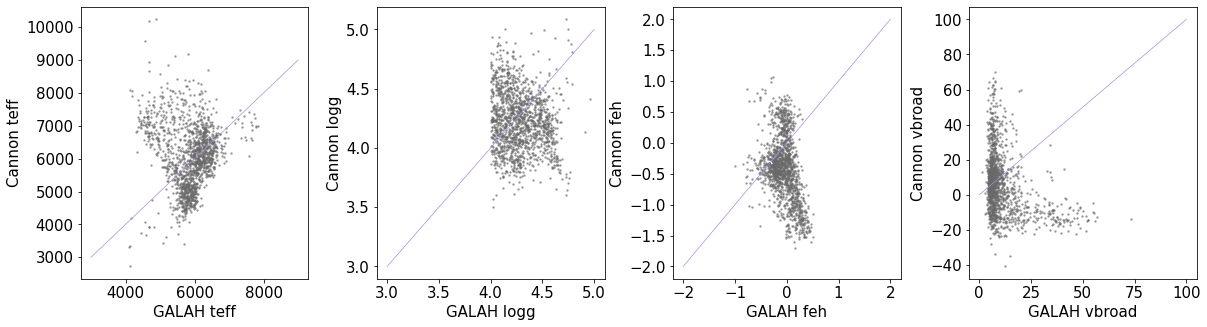

In [8]:
figure(figsize=(20,5))
rcParams['font.size']=15
markersize=3
subplot(141)
plot(teff_galah, teff_cannon, '.', color='dimgrey', ms=markersize, alpha=0.5)
xlabel('GALAH teff');ylabel('Cannon teff')
plot([3000,9000], [3000,9000], lw=0.7, color='#AA8ED9')


subplot(142)
plot(logg_galah, logg_cannon, '.', color='dimgrey', ms=markersize, alpha=0.5)
xlabel('GALAH logg');ylabel('Cannon logg')
plot([3,5], [3,5], lw=0.7, color='#AA8ED9')


subplot(143)
plot(feh_galah, feh_cannon, '.', color='dimgrey', ms=markersize, alpha=0.5)
xlabel('GALAH feh');ylabel('Cannon feh')
plot([-2,2], [-2,2], lw=0.7, color='#AA8ED9')

subplot(144)
plot(vbroad_galah, vbroad_cannon, '.', color='dimgrey', ms=markersize, alpha=0.5)
xlabel('GALAH vbroad');ylabel('Cannon vbroad')
plot([0.1,100], [0.1,100], lw=0.7, color='#AA8ED9')
# xscale('log');yscale('log')

plt.subplots_adjust(wspace=0.3)
#plt.savefig('/Users/isabelangelo/Desktop/test_set_labels.png', dpi=300)

In [ ]:
# this one isn't working at all...I'm not sure why
# but the old model still works so...
# next I should write a quick test, git commit, 
# then look into why this model is behaving so strangely